# Optimization Algorithms

### Gradient Descent (GD)
Algorithm:
1. Initialize parameters (e.g., x)
2. Repeat for number of iterations:
    - Compute the objective function f(x)
    - Compute the gradient ∇f(x)
    - Update parameters: x = x - learning_rate * ∇f(x)

In [79]:
# Objective function
def f(x):
    return x ** 2

# Analytical gradient: df/dx = 2x

In [80]:
# Hyperparameters
lr = 0.1
n_iters = 30

# Initialize parameter
x = torch.tensor(4.0, requires_grad=True)
history = []

In [81]:
for i in range(n_iters):
    history.append(x.item())
    
    # Forward: compute loss
    loss = f(x)
    
    # Backward pass (compute gradient)
    # Ensure gradients from previous iterations are cleared if x is reused in a loop where backward is called multiple times on different graphs
    if x.grad is not None:
        x.grad.zero_()

    # Backward: compute df/dx
    loss.backward()
    
    # Update parameters (manual step, no_grad context to avoid tracking this update)
    with torch.no_grad():
        x -= lr * x.grad
    
    # Log progress
    if (i + 1) % 5 == 0:
        print(f"Iter {i+1:2d}: x={x.item():.4f}, loss={loss.item():.4f}, grad={x.grad.item():.4f}")

Iter  5: x=1.3107, loss=2.6844, grad=3.2768
Iter 10: x=0.4295, loss=0.2882, grad=1.0737
Iter 15: x=0.1407, loss=0.0309, grad=0.3518
Iter 20: x=0.0461, loss=0.0033, grad=0.1153
Iter 25: x=0.0151, loss=0.0004, grad=0.0378
Iter 30: x=0.0050, loss=0.0000, grad=0.0124


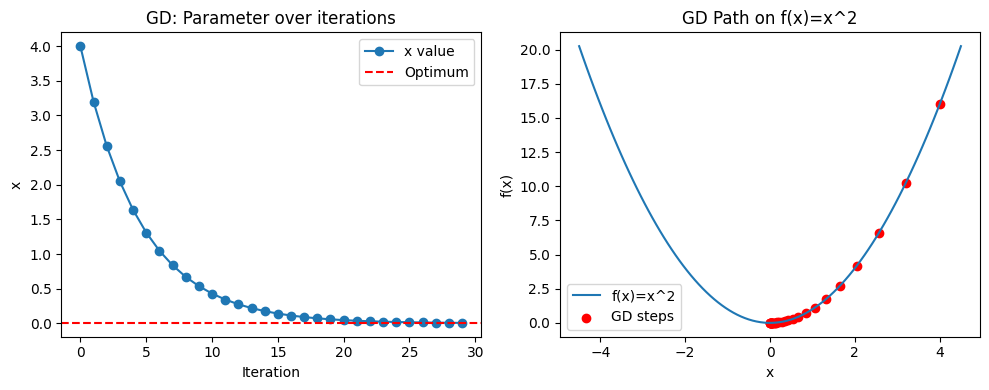

In [82]:
# Plot results
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history, 'o-', label='x value')
plt.axhline(0, color='r', linestyle='--', label='Optimum')
plt.title('GD: Parameter over iterations')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.legend()

plt.subplot(1,2,2)
xs = np.linspace(-4.5, 4.5, 100)
ys = xs**2
plt.plot(xs, ys, label='f(x)=x^2')
plt.scatter(history, np.array(history)**2, color='red', label='GD steps')
plt.title('GD Path on f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()

### Stochastic Gradient Descent (SGD)

- In GD, gradient is computed using the entire dataset (for a typical ML loss). This is expensive.
- In SGD, the gradient is computed using only a single random sample (or a small mini-batch) from the dataset at each iteration.

For a simple function like `f(x)=x^2`, SGD is not directly applicable in its typical ML sense as there's no "dataset" to sample from. The "stochasticity" would come from perhaps adding noise to the gradient or using noisy measurements of the function.

In [83]:
# Generate synthetic linear data: y = 2x - 1 + noise
N = 100
torch.manual_seed(0)
X = 2 * torch.rand(N, 1)
y = 2 * X - 1 + 0.1 * torch.randn(N, 1)

In [84]:
# Initialize parameters
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Hyperparameters
learning_rate = 0.1
n_iters = 30

loss_history = []

In [85]:
for epoch in range(n_iters):
    # Shuffle indices
    indices = torch.randperm(N)
    for i in indices:
        xi = X[i].unsqueeze(0)   
        yi = y[i].unsqueeze(0) 
        
        # Forward pass: prediction and loss
        y_pred = w * xi + b
        loss = (y_pred - yi).pow(2).mean()
        
        # Backward pass: compute gradients
        # (zero out old gradients first)
        if w.grad is not None:
            w.grad.zero_()
            b.grad.zero_()
        loss.backward()
        
        # Parameter update, no grad-tracking here
        with torch.no_grad():
            w[:] = w - learning_rate * w.grad
            b[:] = b - learning_rate * b.grad
        
        # Record loss for this sample
        loss_history.append(loss.item())
    
    print(f"Epoch {epoch+1}/{epochs} — w={w.item():.3f}, b={b.item():.3f}")


Epoch 1/10 — w=1.931, b=-0.941
Epoch 2/10 — w=2.019, b=-0.950
Epoch 3/10 — w=1.958, b=-0.987
Epoch 4/10 — w=1.923, b=-0.990
Epoch 5/10 — w=1.986, b=-1.001
Epoch 6/10 — w=1.993, b=-0.940
Epoch 7/10 — w=1.940, b=-0.956
Epoch 8/10 — w=1.976, b=-1.000
Epoch 9/10 — w=1.994, b=-0.956
Epoch 10/10 — w=1.945, b=-0.927
Epoch 11/10 — w=1.970, b=-0.952
Epoch 12/10 — w=1.980, b=-0.964
Epoch 13/10 — w=1.999, b=-0.992
Epoch 14/10 — w=2.006, b=-0.977
Epoch 15/10 — w=2.010, b=-0.961
Epoch 16/10 — w=1.939, b=-0.986
Epoch 17/10 — w=1.917, b=-0.984
Epoch 18/10 — w=1.945, b=-0.961
Epoch 19/10 — w=1.965, b=-0.941
Epoch 20/10 — w=1.986, b=-0.928
Epoch 21/10 — w=2.022, b=-0.945
Epoch 22/10 — w=1.929, b=-0.972
Epoch 23/10 — w=1.963, b=-0.950
Epoch 24/10 — w=1.939, b=-0.978
Epoch 25/10 — w=2.014, b=-0.984
Epoch 26/10 — w=1.941, b=-0.953
Epoch 27/10 — w=1.936, b=-0.987
Epoch 28/10 — w=1.905, b=-0.955
Epoch 29/10 — w=1.899, b=-1.028
Epoch 30/10 — w=1.974, b=-0.963


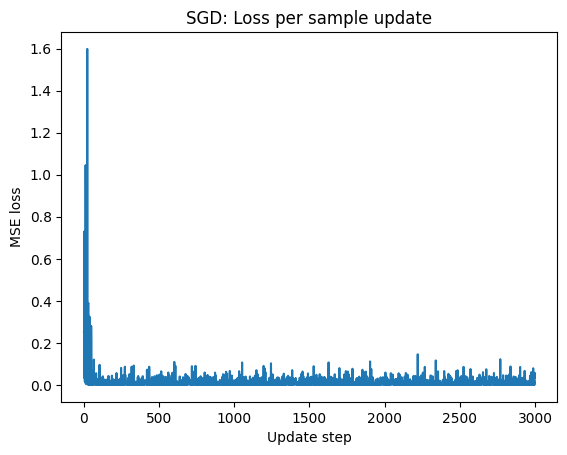

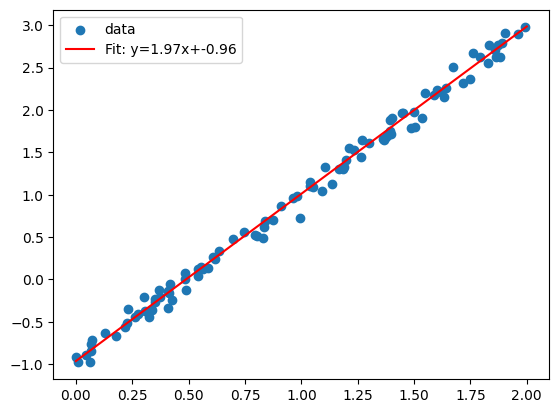

In [86]:
plt.plot(loss_history)
plt.xlabel('Update step')
plt.ylabel('MSE loss')
plt.title('SGD: Loss per sample update')
plt.show()

plt.scatter(X.numpy(), y.numpy(), label='data')
x_line = np.linspace(0, 2, 100)
y_line = w.item() * x_line + b.item()
plt.plot(x_line, y_line, 'r-', label=f'Fit: y={w.item():.2f}x+{b.item():.2f}')
plt.legend()
plt.show()

### Using PyTorch's `torch.optim`

In [87]:
# Parameters to optimize
x_optim = torch.tensor(4.0, requires_grad=True) 

In [88]:
# Optimizer needs to know which Tensors it should update.
optimizer_sgd = torch.optim.SGD([x_optim], lr=0.1)
# Separate param for Adam
optimizer_adam = torch.optim.Adam([torch.tensor(4.0, requires_grad=True)], lr=0.1) 

In [89]:
history_optim_sgd = []
history_optim_adam = []
# Get the tensor Adam is optimizing
x_adam_param = optimizer_adam.param_groups[0]['params'][0] 

In [90]:
print("\n--- Using torch.optim.SGD ---")
for i in range(n_iters):
    history_optim_sgd.append(x_optim.item())
    
    # Zero gradients from previous step
    optimizer_sgd.zero_grad()
    
    # Compute loss
    loss_optim = x_optim**2
    
    # Compute gradients w.r.t. parameters
    loss_optim.backward()
    
    # Update parameters
    optimizer_sgd.step()
    
    if (i+1)%5 == 0:
        print(f"""SGD Iter {i+1}: x = {x_optim.item():.4f}, 
              loss = {loss_optim.item():.4f}""")


--- Using torch.optim.SGD ---
SGD Iter 5: x = 1.3107, 
              loss = 2.6844
SGD Iter 10: x = 0.4295, 
              loss = 0.2882
SGD Iter 15: x = 0.1407, 
              loss = 0.0309
SGD Iter 20: x = 0.0461, 
              loss = 0.0033
SGD Iter 25: x = 0.0151, 
              loss = 0.0004
SGD Iter 30: x = 0.0050, 
              loss = 0.0000


In [91]:
print("\n--- Using torch.optim.Adam ---")
for i in range(n_iters):
    history_optim_adam.append(x_adam_param.item())
    optimizer_adam.zero_grad()
    loss_adam = x_adam_param**2
    loss_adam.backward()
    optimizer_adam.step()
    if (i+1)%5 == 0:
        print(f"""Adam Iter {i+1}: x = {x_adam_param.item():.4f}, 
              loss = {loss_adam.item():.4f}""")


--- Using torch.optim.Adam ---
Adam Iter 5: x = 3.5013, 
              loss = 12.9647
Adam Iter 10: x = 3.0099, 
              loss = 9.6549
Adam Iter 15: x = 2.5336, 
              loss = 6.9024
Adam Iter 20: x = 2.0804, 
              loss = 4.7035
Adam Iter 25: x = 1.6586, 
              loss = 3.0277
Adam Iter 30: x = 1.2757, 
              loss = 1.8194


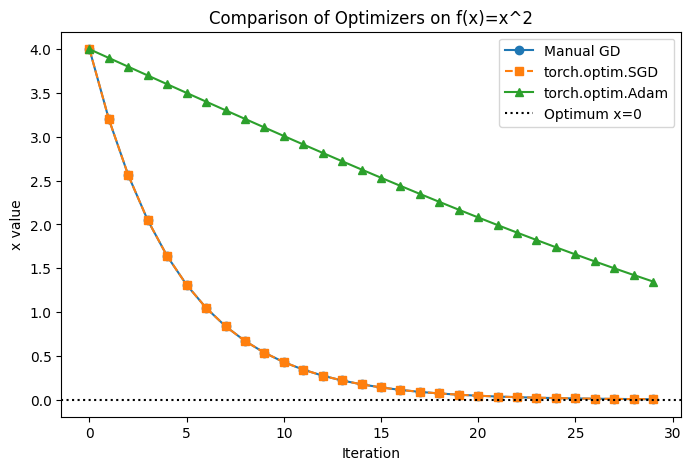

In [101]:
plt.figure(figsize=(8,5))
plt.plot(history, 'o-', label='Manual GD')
plt.plot(history_optim_sgd, 's--', label='torch.optim.SGD') # overlaps manual gd
plt.plot(history_optim_adam, '^-', label='torch.optim.Adam')
plt.title('Comparison of Optimizers on f(x)=x^2')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.axhline(0, color='black', linestyle=':', label='Optimum x=0')
plt.legend()
plt.show()

### Convex Optimization (Conceptual Introduction) ---
Convex Function: A real-valued function f defined on an interval (or a convex set in higher dimensions) is called convex if the line segment between any two points on the graph of the function lies on or above the graph.

In [102]:
# Visualizing Convex vs. Non-Convex Functions ---
x_vals = np.linspace(-3, 3, 100)

# Convex function: f(x) = x^2
f_convex = x_vals**2

# Non-convex function: f(x) = x^4 - 3x^2 + x (has multiple local minima)
f_non_convex = x_vals**4 - 3*x_vals**2 + x_vals

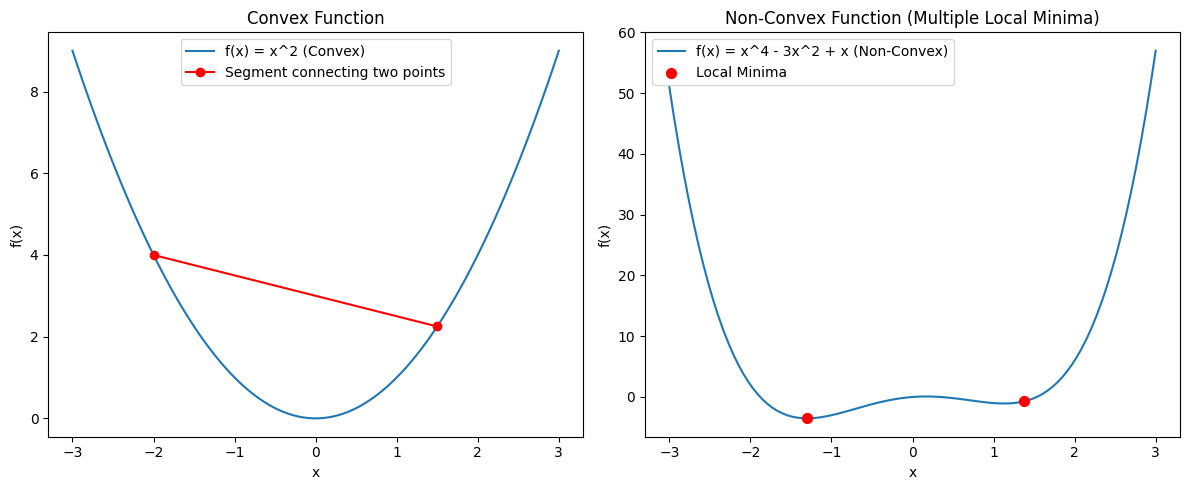

In [103]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_vals, f_convex, label='f(x) = x^2 (Convex)')
plt.title('Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
# Illustrate convexity property: line segment between two points
x1, x2 = -2, 1.5
y1, y2 = x1**2, x2**2
plt.plot([x1, x2], [y1, y2], 'ro-', label='Segment connecting two points')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_vals, f_non_convex, label='f(x) = x^4 - 3x^2 + x (Non-Convex)')
plt.title('Non-Convex Function (Multiple Local Minima)')
plt.xlabel('x')
plt.ylabel('f(x)')
# Highlight local minima (approximate visually)
plt.scatter([-1.3, 1.37], [(-1.3)**4 - 3*(-1.3)**2 -1.3, (1.37)**4 - 3*(1.37)**2 + 1.37], color='red', s=50, zorder=5, label='Local Minima')
plt.legend()

plt.tight_layout()
plt.show()